<a href="https://colab.research.google.com/github/neddanedda/PyTorch_course/blob/main/Flowers_five_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flowers Five Classes from Kaggle


## Installing Kaggle and downloading the data

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
# files.upload()

In [ ]:
! kaggle datasets download -d lara311/flowers-five-classes

Dataset URL: https://www.kaggle.com/datasets/lara311/flowers-five-classes
License(s): apache-2.0
100% 158M/158M [00:05<00:00, 44.0MB/s]
100% 158M/158M [00:05<00:00, 32.0MB/s]


## Useful Functions


### Train step function

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               optimizer: torch.optim.Optimizer,
               loss_fn: torch.nn.Module):
  model.train()

  train_loss = 0
  train_acc = 0

  for batch, (X, y) in tqdm(enumerate(dataloader)):
    # print(X.shape)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss += loss
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum() / len(y)
    # if batch % 10 == 0:
    #   print(f"Processed {batch} batches")

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  return train_loss, train_acc

In [ ]:
# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model_0.parameters(),
#                              lr=0.01)


In [ ]:
# train_step(model_0,
#            train_dataloader,
#            optimizer,
#            loss_fn)

### Test step function

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
  model.eval()

  test_loss = 0
  test_acc = 0

  with torch.inference_mode():
    for batch, (X, y) in enumerate(dataloader):
      y_pred = model(X)
      test_loss += loss_fn(y_pred, y)
      y_pred_prob = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
      test_acc += (y_pred_prob == y).sum() / len(y)

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

  return test_loss, test_acc

In [ ]:
# test_step(model_0,
#           test_dataloader,
#           loss_fn)

### Train loop function

In [ ]:
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module =nn.CrossEntropyLoss(),
          epochs: int =5):
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model,
                                       train_dataloader,
                                       optimizer,
                                       loss_fn)
    test_loss, test_acc = test_step(model,
                                    test_dataloader,
                                    loss_fn)

    print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

    results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
    results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
    results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
    results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

  return results


### Confusion matrix function

In [ ]:
# confusion matrix
try:
  import torchmetrics
except:
  !pip install -q torchmetrics
  import torchmetrics

from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 22.7 MB/s eta 0:00:00


In [ ]:
def confusion_matrix_plot(model: nn.Module,
                          test_dataloader: torch.utils.data.DataLoader,
                          class_names: list):
  # calculating the predictions on the test dataset
  model.eval()
  with torch.inference_mode():
    y_pred = []
    y_true = []
    for X, y in test_dataloader:
      y_logit = model(X)
      y_predictions = torch.softmax(y_logit, dim=1).argmax(dim=1)
      y_pred.append(y_predictions)
      y_true.append(y)

  y_pred = torch.cat(y_pred)
  y_true = torch.cat(y_true)

  # calculating the confusion matrix
  confmat = ConfusionMatrix(task='multiclass',num_classes=len(class_names))
  confmat_tensor = confmat(preds=y_pred,
                           target=y_true).numpy()

  plot_confusion_matrix(confmat_tensor, class_names=class_names);


In [ ]:
!unzip flowers-five-classes.zip;

Archive:  flowers-five-classes.zip
  inflating: train/daisy/10140303196_b88d3d6cec.jpg  
  inflating: train/daisy/10172379554_b296050f82_n.jpg  
  inflating: train/daisy/10172567486_2748826a8b.jpg  
  inflating: train/daisy/10172636503_21bededa75_n.jpg  
  inflating: train/daisy/10391248763_1d16681106_n.jpg  
  inflating: train/daisy/10437754174_22ec990b77_m.jpg  
  inflating: train/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: train/daisy/10437929963_bc13eebe0c.jpg  
  inflating: train/daisy/10466290366_cc72e33532.jpg  
  inflating: train/daisy/10466558316_a7198b87e2.jpg  
  inflating: train/daisy/10555749515_13a12a026e.jpg  
  inflating: train/daisy/10555815624_dc211569b0.jpg  
  inflating: train/daisy/10555826524_423eb8bf71_n.jpg  
  inflating: train/daisy/10559679065_50d2b16f6d.jpg  
  inflating: train/daisy/10712722853_5632165b04.jpg  
  inflating: train/daisy/10770585085_4742b9dac3_n.jpg  
  inflating: train/daisy/10841136265_af473efc60.jpg  
  inflating: train/daisy/10993710

## Importing the data and exploring

In [42]:
import random
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from PIL import Image
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [ ]:
data = datasets.ImageFolder(root="train",
                            transform=data_transform, # transform for the data
                            target_transform=None)

In [ ]:
class_names = data.classes

In [ ]:
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
train_data, test_data = train_test_split(data, test_size=0.2)

In [ ]:
len(train_data), len(test_data)

(2196, 550)

### Plotting some random images

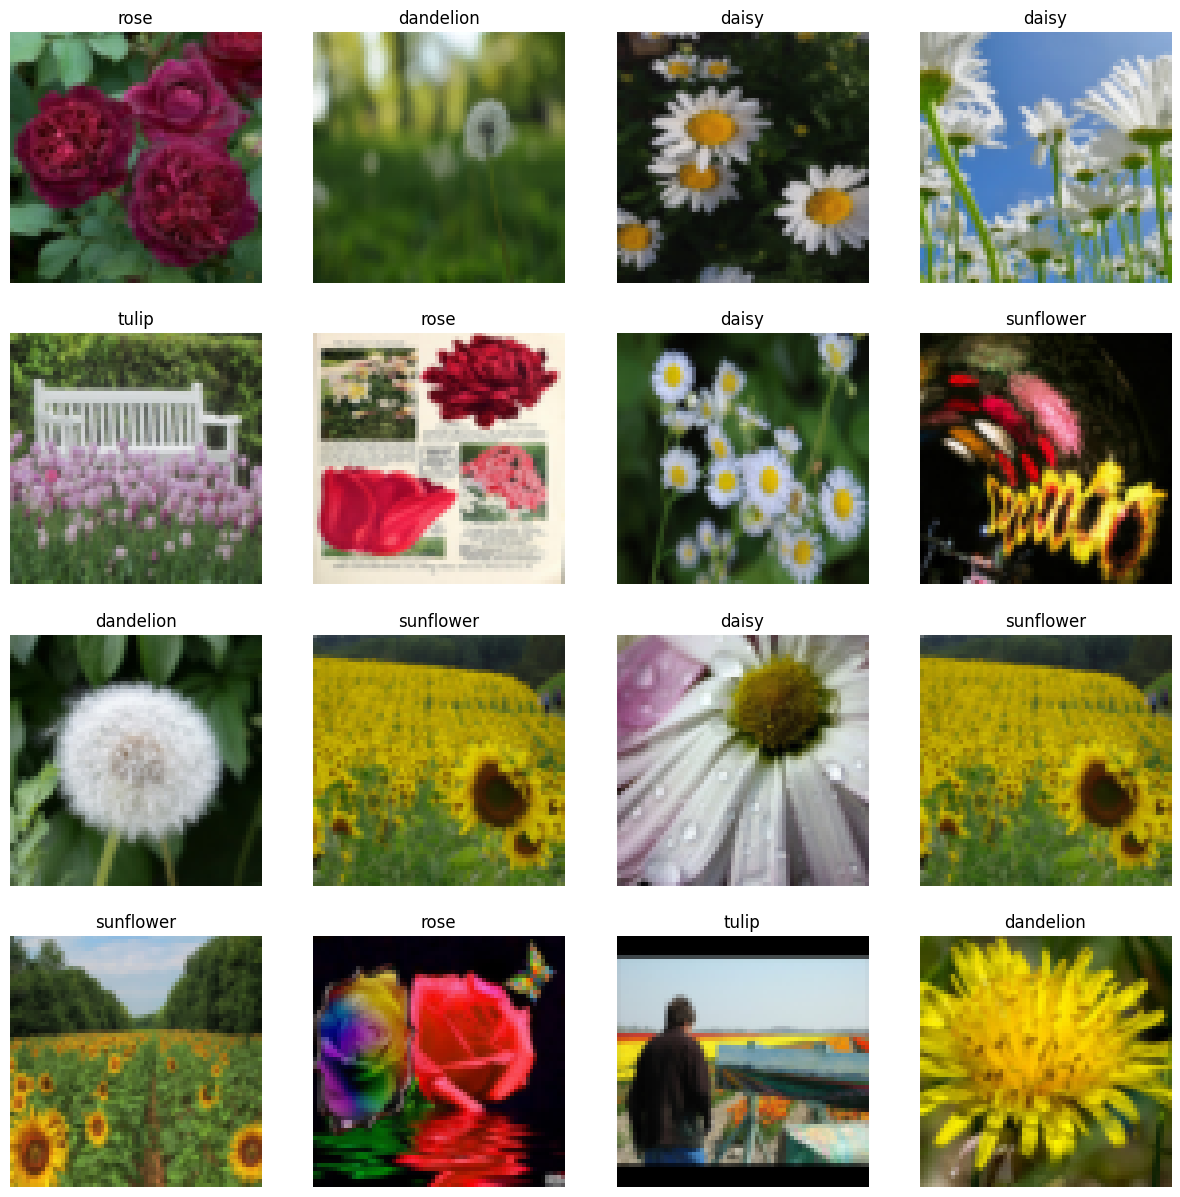

In [ ]:
plt.figure(figsize=(15,15))

for j in range(16):
  plt.subplot(4, 4, j+1)
  random_image = random.choice(range(len(test_data)))
  plt.imshow(train_data[random_image][0].permute(1, 2, 0))
  plt.title(class_names[train_data[random_image][1]])
  plt.axis(False);

### Creating dataloader for the model

In [ ]:
# creating dataloader
BATCH_SIZE = 32
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)
test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

In [ ]:
len(train_dataloader)

69

In [ ]:
train_data[0]

(tensor([[[0.0627, 0.0588, 0.0627,  ..., 0.1725, 0.1569, 0.1255],
          [0.0549, 0.0549, 0.0549,  ..., 0.1686, 0.1373, 0.1137],
          [0.0667, 0.0588, 0.0510,  ..., 0.1490, 0.1098, 0.1020],
          ...,
          [0.0667, 0.0549, 0.0549,  ..., 0.0667, 0.0627, 0.0745],
          [0.0784, 0.0667, 0.0627,  ..., 0.0510, 0.0471, 0.0667],
          [0.0824, 0.0863, 0.0824,  ..., 0.0510, 0.0588, 0.0745]],
 
         [[0.0588, 0.0549, 0.0549,  ..., 0.1098, 0.1059, 0.0902],
          [0.0510, 0.0549, 0.0510,  ..., 0.1098, 0.0902, 0.0745],
          [0.0549, 0.0588, 0.0471,  ..., 0.1020, 0.0784, 0.0706],
          ...,
          [0.0667, 0.0549, 0.0549,  ..., 0.0667, 0.0588, 0.0706],
          [0.0706, 0.0667, 0.0627,  ..., 0.0431, 0.0431, 0.0588],
          [0.0706, 0.0745, 0.0784,  ..., 0.0392, 0.0510, 0.0667]],
 
         [[0.0471, 0.0510, 0.0431,  ..., 0.0392, 0.0431, 0.0353],
          [0.0471, 0.0549, 0.0471,  ..., 0.0471, 0.0353, 0.0314],
          [0.0431, 0.0549, 0.0431,  ...,

In [ ]:
next(enumerate(train_dataloader))[0]

0

## Tiny VGG architecture

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self,
               in_feature: int,
               hidden_units: int,
               output_features: int,
               remaining_dimensions: int):
    super().__init__()
    self.conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels=in_feature,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))
    self.conv_block2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*remaining_dimensions*remaining_dimensions,
                  out_features=output_features)
    )

  def forward(self, x):
    # x = self.conv_block1(x)
    # print(x.shape)
    # x = self.conv_block2(x)
    # print(x.shape)
    # x = self.classifier(x)
    # print(x.shape)
    # x = self.classifier1(x)
    # return(x)
    return self.classifier(
        self.conv_block2(self.conv_block1(x)))


In [ ]:
model_0 = TinyVGG(3, 20, len(class_names), 13)
model_0

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3380, out_features=5, bias=True)
  )
)

## Model 0: Tiny VGG with 10 hidden units

In [ ]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary

In [ ]:
summary(model_0, input_size=[32, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 5]                   --
├─Sequential: 1-1                        [32, 20, 30, 30]          --
│    └─Conv2d: 2-1                       [32, 20, 62, 62]          560
│    └─ReLU: 2-2                         [32, 20, 62, 62]          --
│    └─Conv2d: 2-3                       [32, 20, 60, 60]          3,620
│    └─ReLU: 2-4                         [32, 20, 60, 60]          --
│    └─MaxPool2d: 2-5                    [32, 20, 30, 30]          --
├─Sequential: 1-2                        [32, 20, 13, 13]          --
│    └─Conv2d: 2-6                       [32, 20, 28, 28]          3,620
│    └─ReLU: 2-7                         [32, 20, 28, 28]          --
│    └─Conv2d: 2-8                       [32, 20, 26, 26]          3,620
│    └─ReLU: 2-9                         [32, 20, 26, 26]          --
│    └─MaxPool2d: 2-10                   [32, 20, 13, 13]          --
├─Seq

In [ ]:
model_0 = TinyVGG(3, 10, 5, 13)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr=0.01)

In [ ]:
model_0_results = train(model_0,
                        train_dataloader,
                        test_dataloader,
                        optimizer,
                        loss_fn=loss_fn,
                        epochs=10)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.6072 | train_acc: 0.2191 | test_loss: 1.6014 | test_acc: 0.2500
Epoch: 2 | train_loss: 1.6047 | train_acc: 0.2265 | test_loss: 1.5987 | test_acc: 0.2737
Epoch: 3 | train_loss: 1.6035 | train_acc: 0.2417 | test_loss: 1.5972 | test_acc: 0.2500
Epoch: 4 | train_loss: 1.6026 | train_acc: 0.2245 | test_loss: 1.5953 | test_acc: 0.2789
Epoch: 5 | train_loss: 1.6002 | train_acc: 0.2400 | test_loss: 1.5943 | test_acc: 0.2483
Epoch: 6 | train_loss: 1.5958 | train_acc: 0.2426 | test_loss: 1.5858 | test_acc: 0.2859
Epoch: 7 | train_loss: 1.5845 | train_acc: 0.2744 | test_loss: 1.5699 | test_acc: 0.2604
Epoch: 8 | train_loss: 1.5586 | train_acc: 0.2898 | test_loss: 1.5397 | test_acc: 0.2847
Epoch: 9 | train_loss: 1.5217 | train_acc: 0.3083 | test_loss: 1.5475 | test_acc: 0.2280
Epoch: 10 | train_loss: 1.4940 | train_acc: 0.3147 | test_loss: 1.5083 | test_acc: 0.3218


In [ ]:
model_0_results1 = train(model_0,
                        train_dataloader,
                        test_dataloader,
                        optimizer,
                        loss_fn=loss_fn,
                        epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.4694 | train_acc: 0.3535 | test_loss: 1.4748 | test_acc: 0.3513
Epoch: 2 | train_loss: 1.4492 | train_acc: 0.3504 | test_loss: 1.4621 | test_acc: 0.3524
Epoch: 3 | train_loss: 1.4345 | train_acc: 0.3647 | test_loss: 1.4828 | test_acc: 0.3287
Epoch: 4 | train_loss: 1.4288 | train_acc: 0.3691 | test_loss: 1.4881 | test_acc: 0.3547
Epoch: 5 | train_loss: 1.4232 | train_acc: 0.3715 | test_loss: 1.4556 | test_acc: 0.3553
Epoch: 6 | train_loss: 1.4202 | train_acc: 0.3697 | test_loss: 1.4752 | test_acc: 0.3449
Epoch: 7 | train_loss: 1.4137 | train_acc: 0.3781 | test_loss: 1.4473 | test_acc: 0.3877
Epoch: 8 | train_loss: 1.4082 | train_acc: 0.3901 | test_loss: 1.4587 | test_acc: 0.3791
Epoch: 9 | train_loss: 1.4014 | train_acc: 0.3875 | test_loss: 1.4391 | test_acc: 0.3854
Epoch: 10 | train_loss: 1.3885 | train_acc: 0.3992 | test_loss: 1.4551 | test_acc: 0.3866
Epoch: 11 | train_loss: 1.3698 | train_acc: 0.4234 | test_loss: 1.4135 | test_acc: 0.3900
Epoch: 12 | train_l

In [ ]:
import pandas as pd
model_0_results_total = pd.concat([pd.DataFrame(model_0_results),
                                   pd.DataFrame(model_0_results1)])
model_0_results_total.head()

,train_loss,train_acc,test_loss,test_acc
0,1.607225,0.219112,1.601365,0.250000
1,1.604675,0.226540,1.598669,0.273727
2,1.603538,0.241667,1.597231,0.250000
3,1.602575,0.224457,1.595317,0.278935
4,1.600172,0.240036,1.594273,0.248264


### Evaluating `model_0`

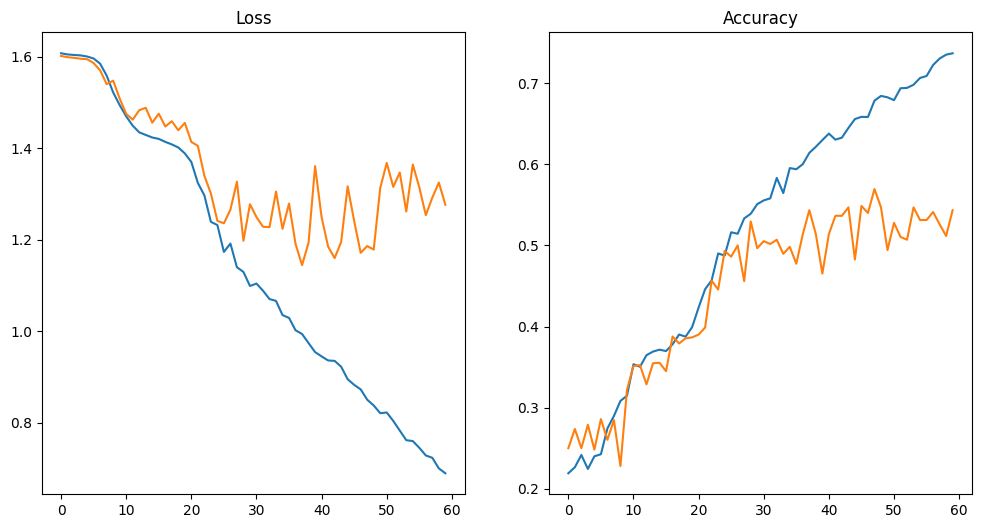

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(model_0_results_total["train_loss"])), model_0_results_total["train_loss"])
plt.plot(range(len(model_0_results_total["train_loss"])), model_0_results_total["test_loss"])
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(range(len(model_0_results_total["train_loss"])), model_0_results_total["train_acc"])
plt.plot(range(len(model_0_results_total["train_loss"])), model_0_results_total["test_acc"])
plt.title("Accuracy");


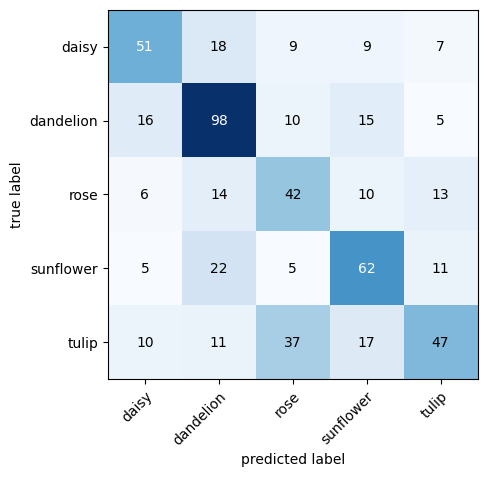

In [ ]:
confusion_matrix_plot(model_0,
                      test_dataloader,
                      class_names)

## Model 1: Tiny VGG with 20 hidden units

In [ ]:
model_1 = TinyVGG(3, 20, 5, 13)

In [ ]:
optimizer = torch.optim.SGD(model_1.parameters(),
                            lr=0.01)

In [ ]:
model_1_results = train(model_1,
                        train_dataloader,
                        test_dataloader,
                        optimizer,
                        loss_fn=loss_fn,
                        epochs=10)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.6082 | train_acc: 0.2124 | test_loss: 1.6020 | test_acc: 0.2500
Epoch: 2 | train_loss: 1.6044 | train_acc: 0.2273 | test_loss: 1.5967 | test_acc: 0.2535
Epoch: 3 | train_loss: 1.6027 | train_acc: 0.2402 | test_loss: 1.5947 | test_acc: 0.2500
Epoch: 4 | train_loss: 1.6001 | train_acc: 0.2289 | test_loss: 1.5912 | test_acc: 0.2517
Epoch: 5 | train_loss: 1.5950 | train_acc: 0.2511 | test_loss: 1.5846 | test_acc: 0.2830
Epoch: 6 | train_loss: 1.5839 | train_acc: 0.2725 | test_loss: 1.5644 | test_acc: 0.2812
Epoch: 7 | train_loss: 1.5511 | train_acc: 0.3090 | test_loss: 1.5301 | test_acc: 0.3108


In [ ]:
model_1_results1 = train(model_1,
                        train_dataloader,
                        test_dataloader,
                        optimizer,
                        loss_fn=loss_fn,
                        epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.2948 | train_acc: 0.4280 | test_loss: 1.3208 | test_acc: 0.4167
Epoch: 2 | train_loss: 1.2546 | train_acc: 0.4529 | test_loss: 1.3016 | test_acc: 0.4167
Epoch: 3 | train_loss: 1.2250 | train_acc: 0.4734 | test_loss: 1.2459 | test_acc: 0.4531
Epoch: 4 | train_loss: 1.2013 | train_acc: 0.4814 | test_loss: 1.2107 | test_acc: 0.4965
Epoch: 5 | train_loss: 1.1797 | train_acc: 0.4937 | test_loss: 1.3214 | test_acc: 0.4317
Epoch: 6 | train_loss: 1.1869 | train_acc: 0.4923 | test_loss: 1.2356 | test_acc: 0.4757
Epoch: 7 | train_loss: 1.1538 | train_acc: 0.5178 | test_loss: 1.2253 | test_acc: 0.4844
Epoch: 8 | train_loss: 1.1405 | train_acc: 0.5230 | test_loss: 1.2314 | test_acc: 0.4809
Epoch: 9 | train_loss: 1.1292 | train_acc: 0.5252 | test_loss: 1.2431 | test_acc: 0.5035
Epoch: 10 | train_loss: 1.1261 | train_acc: 0.5364 | test_loss: 1.2948 | test_acc: 0.4427
Epoch: 11 | train_loss: 1.1289 | train_acc: 0.5265 | test_loss: 1.2448 | test_acc: 0.4826
Epoch: 12 | train_l

In [ ]:
model_1_results_total = pd.concat([pd.DataFrame(model_1_results),
                                   pd.DataFrame(model_1_results1)])

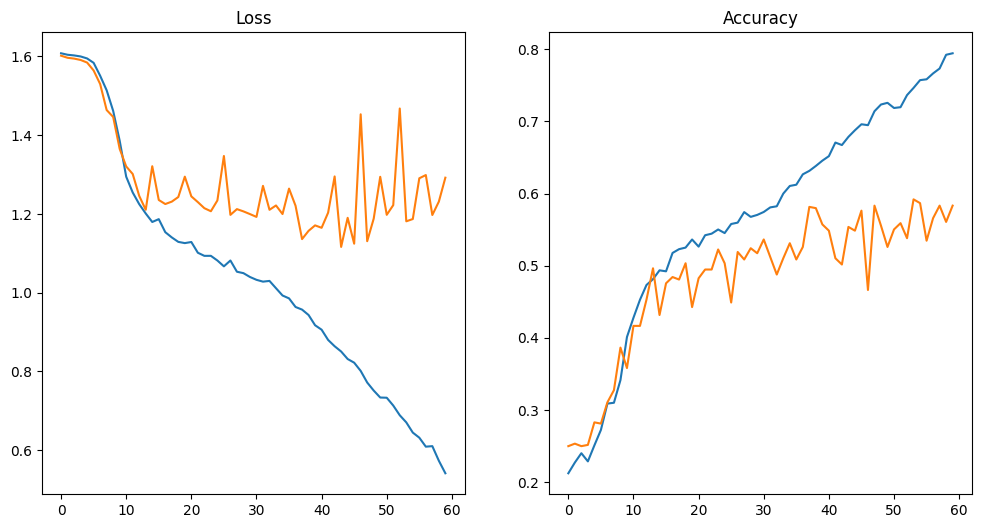

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(model_1_results_total["train_loss"])), model_1_results_total["train_loss"])
plt.plot(range(len(model_1_results_total["train_loss"])), model_1_results_total["test_loss"])
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(range(len(model_1_results_total["train_loss"])), model_1_results_total["train_acc"])
plt.plot(range(len(model_1_results_total["train_loss"])), model_1_results_total["test_acc"])
plt.title("Accuracy");


## Model 2: Tiny VGG with 40 hidden units

In [ ]:
model_2 = TinyVGG(3, 40, 5, 13)

In [ ]:
optimizer = torch.optim.SGD(model_2.parameters(),
                            lr=0.01)

In [ ]:
model_2_results = train(model_2,
                        train_dataloader,
                        test_dataloader,
                        optimizer,
                        loss_fn=loss_fn,
                        epochs=10)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.6059 | train_acc: 0.2096 | test_loss: 1.5985 | test_acc: 0.2998
Epoch: 2 | train_loss: 1.5990 | train_acc: 0.2330 | test_loss: 1.5912 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.5829 | train_acc: 0.2572 | test_loss: 1.5686 | test_acc: 0.2836
Epoch: 4 | train_loss: 1.5233 | train_acc: 0.3103 | test_loss: 1.4757 | test_acc: 0.3466
Epoch: 5 | train_loss: 1.4309 | train_acc: 0.3772 | test_loss: 1.3858 | test_acc: 0.4097
Epoch: 6 | train_loss: 1.3553 | train_acc: 0.4032 | test_loss: 1.4406 | test_acc: 0.3663
Epoch: 7 | train_loss: 1.2923 | train_acc: 0.4456 | test_loss: 1.3123 | test_acc: 0.4410
Epoch: 8 | train_loss: 1.2455 | train_acc: 0.4706 | test_loss: 1.2417 | test_acc: 0.4896


In [ ]:
model_2_results1 = train(model_2,
                        train_dataloader,
                        test_dataloader,
                        optimizer,
                        loss_fn=loss_fn,
                        epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1627 | train_acc: 0.5184 | test_loss: 1.2308 | test_acc: 0.5000
Epoch: 2 | train_loss: 1.1573 | train_acc: 0.5137 | test_loss: 1.2569 | test_acc: 0.5017
Epoch: 3 | train_loss: 1.1359 | train_acc: 0.5193 | test_loss: 1.2151 | test_acc: 0.4965
Epoch: 4 | train_loss: 1.1367 | train_acc: 0.5260 | test_loss: 1.2501 | test_acc: 0.4774
Epoch: 5 | train_loss: 1.1115 | train_acc: 0.5373 | test_loss: 1.1880 | test_acc: 0.5330
Epoch: 6 | train_loss: 1.1072 | train_acc: 0.5476 | test_loss: 1.1922 | test_acc: 0.5139
Epoch: 7 | train_loss: 1.0996 | train_acc: 0.5495 | test_loss: 1.2418 | test_acc: 0.5017
Epoch: 8 | train_loss: 1.0936 | train_acc: 0.5473 | test_loss: 1.2005 | test_acc: 0.5260
Epoch: 9 | train_loss: 1.0797 | train_acc: 0.5610 | test_loss: 1.1698 | test_acc: 0.5226
Epoch: 10 | train_loss: 1.0726 | train_acc: 0.5659 | test_loss: 1.2034 | test_acc: 0.5139
Epoch: 11 | train_loss: 1.0676 | train_acc: 0.5838 | test_loss: 1.2063 | test_acc: 0.5104
Epoch: 12 | train_l

In [ ]:
model_2_results_total = pd.concat([pd.DataFrame(model_2_results),
                                   pd.DataFrame(model_2_results1)])

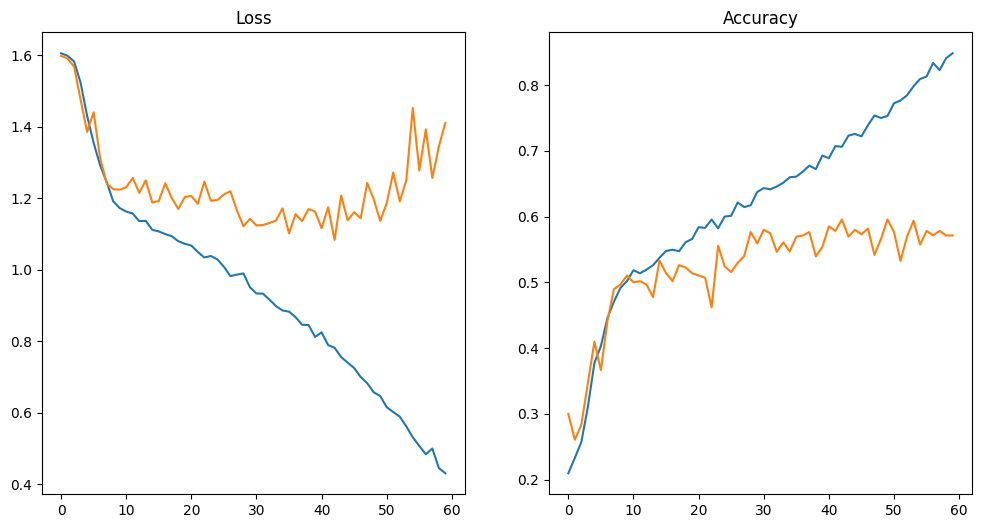

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(model_2_results_total["train_loss"])), model_2_results_total["train_loss"])
plt.plot(range(len(model_2_results_total["train_loss"])), model_2_results_total["test_loss"])
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(range(len(model_2_results_total["train_loss"])), model_2_results_total["train_acc"])
plt.plot(range(len(model_2_results_total["train_loss"])), model_2_results_total["test_acc"])
plt.title("Accuracy");


## Comparing Tiny VGG models with different hidden units

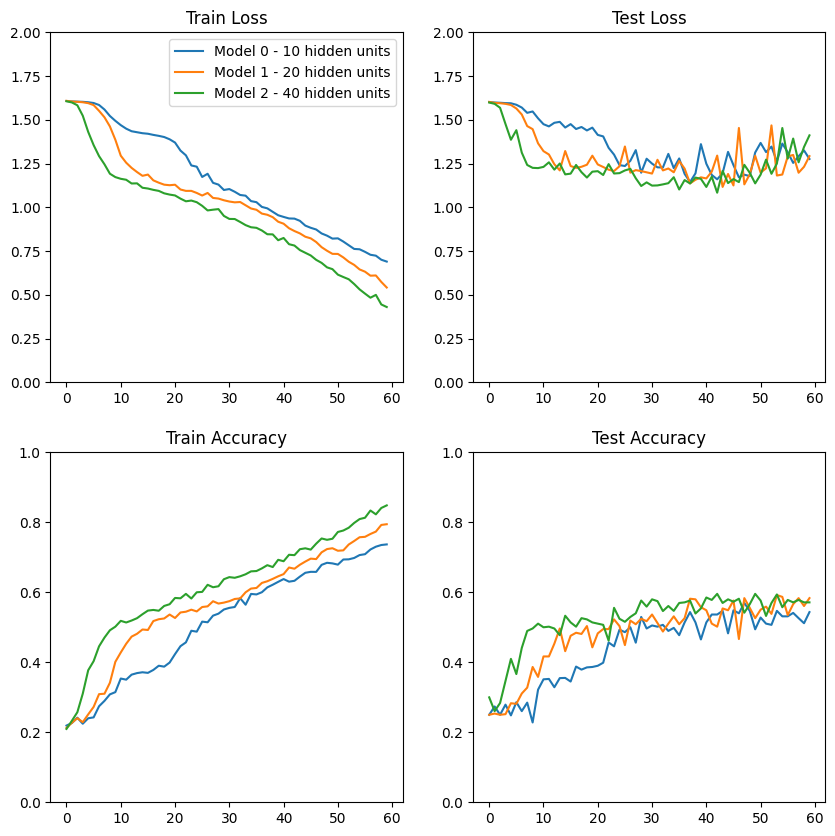

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(range(len(model_0_results_total["train_loss"])), model_0_results_total["train_loss"], label="Model 0 - 10 hidden units")
plt.plot(range(len(model_1_results_total["train_loss"])), model_1_results_total["train_loss"], label="Model 1 - 20 hidden units")
plt.plot(range(len(model_2_results_total["train_loss"])), model_2_results_total["train_loss"], label="Model 2 - 40 hidden units")
plt.legend()
plt.ylim(0, 2)
plt.title("Train Loss")

plt.subplot(2, 2, 2)
plt.plot(range(len(model_0_results_total["train_loss"])), model_0_results_total["test_loss"])
plt.plot(range(len(model_1_results_total["train_loss"])), model_1_results_total["test_loss"])
plt.plot(range(len(model_2_results_total["train_loss"])), model_2_results_total["test_loss"])
plt.ylim(0, 2)
plt.title("Test Loss")

plt.subplot(2, 2, 3)
plt.plot(range(len(model_0_results_total["train_loss"])), model_0_results_total["train_acc"])
plt.plot(range(len(model_1_results_total["train_loss"])), model_1_results_total["train_acc"])
plt.plot(range(len(model_2_results_total["train_loss"])), model_2_results_total["train_acc"])
plt.ylim(0, 1)
plt.title("Train Accuracy");

plt.subplot(2, 2, 4)
plt.plot(range(len(model_0_results_total["train_loss"])), model_0_results_total["test_acc"])
plt.plot(range(len(model_1_results_total["train_loss"])), model_1_results_total["test_acc"])
plt.plot(range(len(model_2_results_total["train_loss"])), model_2_results_total["test_acc"])
plt.ylim(0, 1)
plt.title("Test Accuracy");

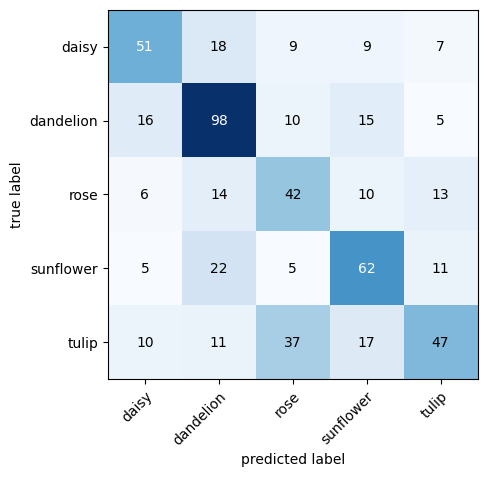

In [ ]:
confusion_matrix_plot(model_0,
                      test_dataloader,
                      class_names)

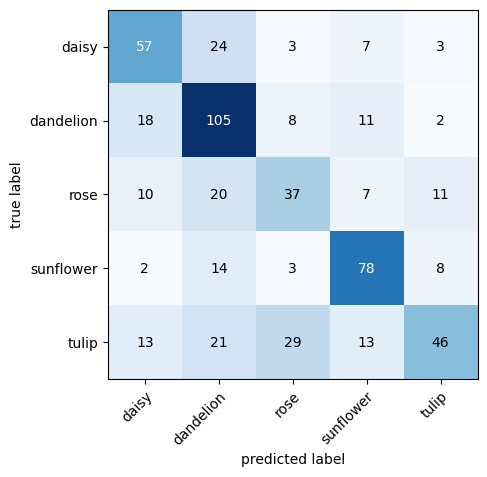

In [ ]:
confusion_matrix_plot(model_1,
                      test_dataloader,
                      class_names)

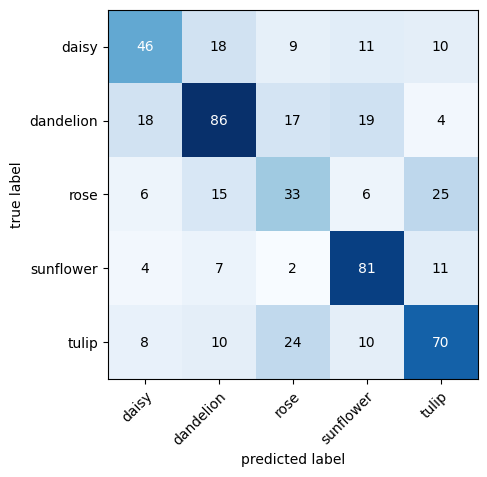

In [ ]:
confusion_matrix_plot(model_2,
                      test_dataloader,
                      class_names)

## VGG-11 architecture

https://www.geeksforgeeks.org/vgg-16-cnn-model/

In [ ]:
class VGG11architecture(nn.Module):
  def __init__(self):
    super().__init__()
    self.convblock1 = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64,
                  kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        # nn.Conv2d(in_channels=64, out_channels=64,
        #           kernel_size=3, stride=1, padding=1),
        nn.MaxPool2d(kernel_size=2))

    self.convblock2 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=128,
                  kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        # nn.Conv2d(in_channels=128, out_channels=128,
        #           kernel_size=3, stride=1, padding=1),
        nn.MaxPool2d(kernel_size=2))

    self.convblock3 = nn.Sequential(
        nn.Conv2d(in_channels=128, out_channels=256,
                  kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=256, out_channels=256,
                  kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        # nn.Conv2d(in_channels=256, out_channels=256,
        #           kernel_size=3, stride=1, padding=1),
        nn.MaxPool2d(kernel_size=2))

    self.convblock4 = nn.Sequential(
        nn.Conv2d(in_channels=256, out_channels=512,
                  kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=512, out_channels=512,
                  kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        # nn.Conv2d(in_channels=512, out_channels=512,
        #           kernel_size=3, stride=1, padding=1),
        nn.MaxPool2d(kernel_size=2))

    self.convblock5 = nn.Sequential(
        nn.Conv2d(in_channels=512, out_channels=512,
                  kernel_size=3, stride=1, padding=1),
        nn.Conv2d(in_channels=512, out_channels=512,
                  kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        # nn.Conv2d(in_channels=512, out_channels=512,
        #           kernel_size=3, stride=1, padding=1),
        nn.MaxPool2d(kernel_size=2))

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=512*7*7, out_features=4096),
        nn.ReLU(),
        nn.Linear(in_features=4096, out_features=4096),
        nn.ReLU(),
        nn.Linear(in_features=4096, out_features=5),
        nn.ReLU()
    )

  def forward(self, x):
    return self.classifier(
        self.convblock5(
            self.convblock4(
                self.convblock3(
                    self.convblock2(
                        self.convblock1(x))))))




### Importing data

In [35]:
data_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

In [36]:
data = datasets.ImageFolder(root="train",
                            transform=data_transform, # transform for the data
                            target_transform=None)

In [37]:
class_names = data.classes

In [47]:
train_data, test_data = train_test_split(data, test_size=0.04)
other_data, train_data = train_test_split(train_data, test_size=0.2)

In [48]:
len(train_data), len(test_data)

(528, 110)

In [49]:
train_dataloader = DataLoader(train_data,
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=32,
                             shuffle=True)
len(train_dataloader)

17

In [50]:
model_3 = VGG11architecture()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

### Fitting the model

In [51]:
model_3_results = train(model_3,
                        train_dataloader,
                        test_dataloader,
                        optimizer,
                        epochs=5)

  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Epoch: 1 | train_loss: 1.6047 | train_acc: 0.2335 | test_loss: 1.5938 | test_acc: 0.2366


0it [00:00, ?it/s]

Epoch: 2 | train_loss: 1.5974 | train_acc: 0.2371 | test_loss: 1.5869 | test_acc: 0.2723


0it [00:00, ?it/s]

Epoch: 3 | train_loss: 1.5939 | train_acc: 0.2335 | test_loss: 1.5871 | test_acc: 0.2567


0it [00:00, ?it/s]

Epoch: 4 | train_loss: 1.5926 | train_acc: 0.2243 | test_loss: 1.5733 | test_acc: 0.2667


0it [00:00, ?it/s]

Epoch: 5 | train_loss: 1.5920 | train_acc: 0.2316 | test_loss: 1.5839 | test_acc: 0.2567


In [53]:
model_3_results = pd.DataFrame(model_3_results)
# model_3_results

In [54]:
from pathlib import Path
MODEL_PATH = Path("sample_data")
MODEL_NAME = "vgg11_five_flowers_5_epochs.pth"
RESULT_PATH = MODEL_PATH / "vgg11_summary_results.pickle"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# save the model
torch.save(obj=model_3.state_dict(),
           f=MODEL_SAVE_PATH)

In [55]:
with open('sample_data/vgg11_summary_results.pickle', 'wb') as handle:
    pickle.dump(model_3_results, handle)

In [ ]:
model_3_results1 = train(model_3,
                         train_dataloader,
                         test_dataloader,
                         optimizer,
                         epochs=5)

model_3_results = pd.concat(model_3_results,
                            pd.DataFrame(model_3_results1))
with open('sample_data/vgg11_summary_results.pickle', 'wb') as handle:
    pickle.dump(model_3_results, handle)

In [32]:
MODEL_NAME = "vgg11_five_flowers_10_epochs.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# save the model
torch.save(obj=model_3.state_dict(),
           f=MODEL_SAVE_PATH)

In [ ]:
model_3_results1 = train(model_3,
                         train_dataloader,
                         test_dataloader,
                         optimizer,
                         epochs=5)

model_3_results = pd.concat(model_3_results,
                            pd.DataFrame(model_3_results1))
with open('sample_data/vgg11_summary_results.pickle', 'wb') as handle:
    pickle.dump(model_3_results, handle)

MODEL_NAME = "vgg11_five_flowers_15_epochs.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# save the model
torch.save(obj=model_3.state_dict(),
           f=MODEL_SAVE_PATH)

## Tiny VGG version 2 (archived not-working)

In [ ]:
class TinyVGG2(nn.Module):
  def __init__(self,
               in_feature: int,
               hidden_units: int,
               output_features: int,
               remaining_dimensions: int):
    super().__init__()
    self.conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels=in_feature,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))
    self.conv_block2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*remaining_dimensions*remaining_dimensions,
                  out_features=output_features)
    )

  def forward(self, x):
    return self.classifier(
        self.conv_block2(self.conv_block1(x)))

In [ ]:
model_3 = TinyVGG2(3, 10, 5, 11)
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

In [ ]:
model_3_results = train(model_3,
                        train_dataloader,
                        test_dataloader,
                        optimizer,
                        loss_fn=loss_fn,
                        epochs=60)

model_3_results_total = pd.DataFrame(model_3_results)

  0%|          | 0/60 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.6066 | train_acc: 0.2257 | test_loss: 1.6019 | test_acc: 0.2344
Epoch: 2 | train_loss: 1.6054 | train_acc: 0.2216 | test_loss: 1.5992 | test_acc: 0.2500
Epoch: 3 | train_loss: 1.6047 | train_acc: 0.2285 | test_loss: 1.5969 | test_acc: 0.2500
Epoch: 4 | train_loss: 1.5987 | train_acc: 0.2298 | test_loss: 1.6211 | test_acc: 0.2523
Epoch: 5 | train_loss: 1.6001 | train_acc: 0.2380 | test_loss: 1.5975 | test_acc: 0.2500
Epoch: 6 | train_loss: 1.6053 | train_acc: 0.2190 | test_loss: 1.5977 | test_acc: 0.2500
Epoch: 7 | train_loss: 1.6050 | train_acc: 0.2284 | test_loss: 1.5989 | test_acc: 0.2500
Epoch: 8 | train_loss: 1.6049 | train_acc: 0.2282 | test_loss: 1.5978 | test_acc: 0.2344
Epoch: 9 | train_loss: 1.6052 | train_acc: 0.2162 | test_loss: 1.5975 | test_acc: 0.2500
Epoch: 10 | train_loss: 1.6052 | train_acc: 0.2254 | test_loss: 1.5989 | test_acc: 0.2500
Epoch: 11 | train_loss: 1.6052 | train_acc: 0.2216 | test_loss: 1.5996 | test_acc: 0.2500
Epoch: 12 | train_l

In [ ]:
model_4 = TinyVGG2(3, 10, 5, 11)
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

In [ ]:
model_4_results = train(model_4,
                        train_dataloader,
                        test_dataloader,
                        optimizer,
                        loss_fn=loss_fn,
                        epochs=60)

model_4_results_total = pd.DataFrame(model_4_results)

  0%|          | 0/60 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.6089 | train_acc: 0.2282 | test_loss: 1.6066 | test_acc: 0.2500
Epoch: 2 | train_loss: 1.6089 | train_acc: 0.2279 | test_loss: 1.6066 | test_acc: 0.2500
Epoch: 3 | train_loss: 1.6089 | train_acc: 0.2287 | test_loss: 1.6066 | test_acc: 0.2500
Epoch: 4 | train_loss: 1.6088 | train_acc: 0.2290 | test_loss: 1.6066 | test_acc: 0.2500
Epoch: 5 | train_loss: 1.6089 | train_acc: 0.2279 | test_loss: 1.6066 | test_acc: 0.2500
Epoch: 6 | train_loss: 1.6089 | train_acc: 0.2279 | test_loss: 1.6066 | test_acc: 0.2500
Epoch: 7 | train_loss: 1.6088 | train_acc: 0.2290 | test_loss: 1.6066 | test_acc: 0.2500
Epoch: 8 | train_loss: 1.6089 | train_acc: 0.2284 | test_loss: 1.6066 | test_acc: 0.2500
Epoch: 9 | train_loss: 1.6089 | train_acc: 0.2287 | test_loss: 1.6066 | test_acc: 0.2500
Epoch: 10 | train_loss: 1.6089 | train_acc: 0.2284 | test_loss: 1.6066 | test_acc: 0.2500
Epoch: 11 | train_loss: 1.6089 | train_acc: 0.2282 | test_loss: 1.6066 | test_acc: 0.2500
Epoch: 12 | train_l

In [ ]:
model_5 = TinyVGG2(3, 10, 5, 11)
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

In [ ]:
model_5_results = train(model_5,
                        train_dataloader,
                        test_dataloader,
                        optimizer,
                        loss_fn=loss_fn,
                        epochs=60)
model_5_results_total = pd.DataFrame(model_5_results)

  0%|          | 0/60 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.6094 | train_acc: 0.1851 | test_loss: 1.6060 | test_acc: 0.1707
Epoch: 2 | train_loss: 1.6093 | train_acc: 0.1851 | test_loss: 1.6060 | test_acc: 0.1707
Epoch: 3 | train_loss: 1.6093 | train_acc: 0.1857 | test_loss: 1.6060 | test_acc: 0.1707
Epoch: 4 | train_loss: 1.6093 | train_acc: 0.1857 | test_loss: 1.6060 | test_acc: 0.1707
Epoch: 5 | train_loss: 1.6093 | train_acc: 0.1862 | test_loss: 1.6060 | test_acc: 0.1707
Epoch: 6 | train_loss: 1.6092 | train_acc: 0.1857 | test_loss: 1.6060 | test_acc: 0.1707
Epoch: 7 | train_loss: 1.6093 | train_acc: 0.1857 | test_loss: 1.6060 | test_acc: 0.1707
Epoch: 8 | train_loss: 1.6093 | train_acc: 0.1849 | test_loss: 1.6060 | test_acc: 0.1707
Epoch: 9 | train_loss: 1.6093 | train_acc: 0.1851 | test_loss: 1.6060 | test_acc: 0.1707
Epoch: 10 | train_loss: 1.6095 | train_acc: 0.1849 | test_loss: 1.6060 | test_acc: 0.1707
Epoch: 11 | train_loss: 1.6093 | train_acc: 0.1851 | test_loss: 1.6060 | test_acc: 0.1707
Epoch: 12 | train_l

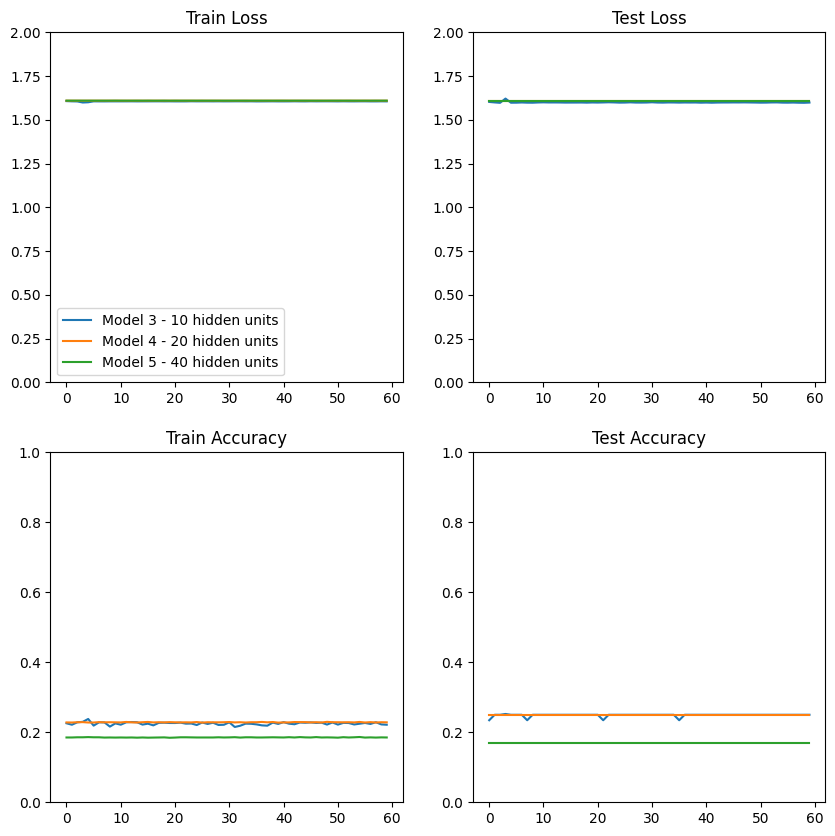

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(range(len(model_3_results_total["train_loss"])), model_3_results_total["train_loss"], label="Model 3 - 10 hidden units")
plt.plot(range(len(model_4_results_total["train_loss"])), model_4_results_total["train_loss"], label="Model 4 - 20 hidden units")
plt.plot(range(len(model_5_results_total["train_loss"])), model_5_results_total["train_loss"], label="Model 5 - 40 hidden units")
plt.legend()
plt.ylim(0, 2)
plt.title("Train Loss")

plt.subplot(2, 2, 2)
plt.plot(range(len(model_3_results_total["train_loss"])), model_3_results_total["test_loss"])
plt.plot(range(len(model_4_results_total["train_loss"])), model_4_results_total["test_loss"])
plt.plot(range(len(model_5_results_total["train_loss"])), model_5_results_total["test_loss"])
plt.ylim(0, 2)
plt.title("Test Loss")

plt.subplot(2, 2, 3)
plt.plot(range(len(model_3_results_total["train_loss"])), model_3_results_total["train_acc"])
plt.plot(range(len(model_4_results_total["train_loss"])), model_4_results_total["train_acc"])
plt.plot(range(len(model_5_results_total["train_loss"])), model_5_results_total["train_acc"])
plt.ylim(0, 1)
plt.title("Train Accuracy");

plt.subplot(2, 2, 4)
plt.plot(range(len(model_3_results_total["train_loss"])), model_3_results_total["test_acc"])
plt.plot(range(len(model_4_results_total["train_loss"])), model_4_results_total["test_acc"])
plt.plot(range(len(model_5_results_total["train_loss"])), model_5_results_total["test_acc"])
plt.ylim(0, 1)
plt.title("Test Accuracy");

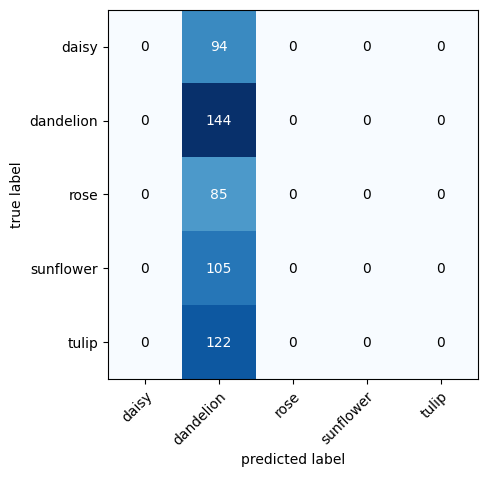

In [ ]:
confusion_matrix_plot(model_3,
                      test_dataloader,
                      class_names)

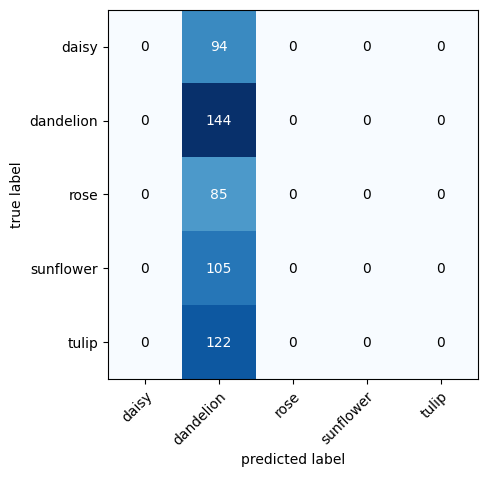

In [ ]:
confusion_matrix_plot(model_4,
                      test_dataloader,
                      class_names)

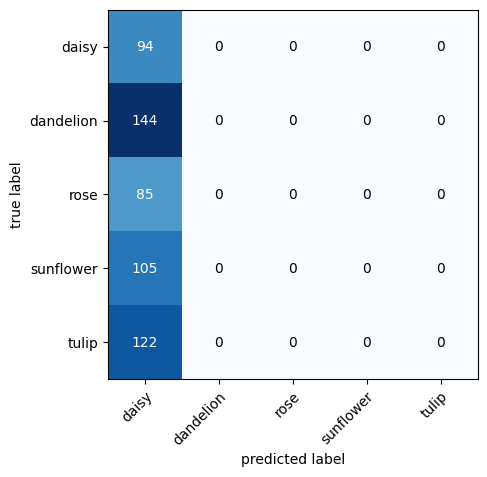

In [ ]:
confusion_matrix_plot(model_5,
                      test_dataloader,
                      class_names)